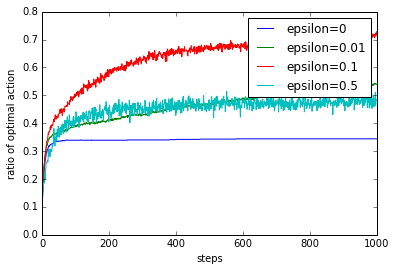

In [17]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

arms = 10
steps = 1000
runs = 1000
epsilons = [0, 0.01, 0.1, 0.5]

for epsilon in epsilons:
    total_optimal = np.zeros(steps)

    for run in range(runs):
        values = np.random.normal(size=arms)
        optimal = np.argmax(values)
        # Total number of actions taken
        actions = np.ones(arms)
        # Total rewards for action
        rewards = np.zeros(arms)

        for step in range(steps):
            if np.random.rand(1) > epsilon:
                estimates = rewards / actions
                action = np.argmax(estimates)
            else:
                action = np.random.randint(0, 9)
            actions[action] += 1
            rewards[action] += np.random.normal(values[action])
            total_optimal[step] += action == optimal

    average_optimal = total_optimal / runs
    plt.plot(average_optimal)
    
plt.xlabel('steps')
plt.ylabel('ratio of optimal action')
plt.legend(['epsilon={}'.format(epsilon) for epsilon in epsilons])
plt.show()

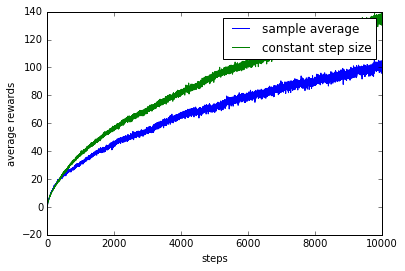

In [23]:
# Excersise 2.3 - compare sample average and constant step size in non-stationary case
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

arms = 10
steps = 10000
runs = 1000
epsilon = 0.1

# sample average
total_rewards = np.zeros(steps)

for run in range(runs):
    values = np.zeros(arms)
    optimal = np.argmax(values)
    # Total number of actions taken
    actions = np.ones(arms)
    # Average rewards for action
    rewards = np.zeros(arms)

    for step in range(steps):
        # True values random walk, thus non-stationary
        values += np.random.normal(size=arms)
        if np.random.rand(1) > epsilon:
            estimates = rewards / actions
            action = np.argmax(estimates)
        else:
            action = np.random.randint(0, 9)
        actual_reward = np.random.normal(values[action])
        rewards[action] += 1.0 / actions[action] * (actual_reward - rewards[action])
        actions[action] += 1
        total_rewards[step] += actual_reward

average_rewards = total_rewards / runs
plt.plot(average_rewards)

# constant step size
step_size = 0.1
total_rewards = np.zeros(steps)

for run in range(runs):
    values = np.zeros(arms)
    optimal = np.argmax(values)
    # Average rewards for action
    rewards = np.zeros(arms)

    for step in range(steps):
        # True values random walk, thus non-stationary
        values += np.random.normal(size=arms)
        if np.random.rand(1) > epsilon:
            action = np.argmax(rewards)
        else:
            action = np.random.randint(0, 9)
        actual_reward = np.random.normal(values[action])
        rewards[action] += step_size * (actual_reward - rewards[action])
        total_rewards[step] += actual_reward

average_rewards = total_rewards / runs
plt.plot(average_rewards)
plt.xlabel('steps')
plt.ylabel('average rewards')
plt.legend(['sample average', 'constant step size'])
plt.show()